# Setting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

import findspark
findspark.init()


from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("my_first_pyspark")\
        .config('spark.ui.port','4050')\
        .getOrCreate()

sc = spark.sparkContext

# Data 분석

In [ ]:
raw_data = spark.read.format("csv").option("header","true").load('/content/drive/MyDrive/Colab Notebooks/데이터분석을위한프로그래밍/diabetes.csv')
raw_data.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



## Schema 확인 및 수정

In [ ]:

raw_data.printSchema()

root
 |-- Pregnancies: string (nullable = true)
 |-- Glucose: string (nullable = true)
 |-- BloodPressure: string (nullable = true)
 |-- SkinThickness: string (nullable = true)
 |-- Insulin: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- DiabetesPedigreeFunction: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Outcome: string (nullable = true)



In [ ]:
#string을 integer로 바꿔주기  

from pyspark.sql.types import *

schema = StructType([
    StructField('Pregnancies',FloatType(),True), #nullable = True로 해두면됨.
    StructField('Glucose',FloatType(),True),
    StructField('BloodPressure',FloatType(),True),
    StructField('SkinThickness',FloatType(),True),
    StructField('Insulin',FloatType(),True),
    StructField('BMI',FloatType(),True),
    StructField('DiabetesPedigreeFunction',FloatType(),True),
    StructField('Age',IntegerType(),True),
    StructField('Outcome',IntegerType(),True),
])

raw_data = spark.read.format("csv").option("header","true").schema(schema).load('/content/drive/MyDrive/Colab Notebooks/데이터분석을위한프로그래밍/diabetes.csv')
raw_data.printSchema()

root
 |-- Pregnancies: float (nullable = true)
 |-- Glucose: float (nullable = true)
 |-- BloodPressure: float (nullable = true)
 |-- SkinThickness: float (nullable = true)
 |-- Insulin: float (nullable = true)
 |-- BMI: float (nullable = true)
 |-- DiabetesPedigreeFunction: float (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



## 간단한 통계치를 보여주는 describe, summary

In [ ]:
 # 간단한 통계치를 보여주는 describe
df = raw_data
df.describe().show()
# count는 null이 아닌 데이터 몇개 있는지. 


+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|              BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|              768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.99257813890775|      0.4718763029280429|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.9522175

In [ ]:
df.describe('Glucose', 'BloodPressure' ,'SkinThickness', 'Insulin', 'BMI').show()

# min 값이 -0이 되면 안되는데... 결측값이 0으로 되어있나보다. 

+-------+-----------------+------------------+------------------+------------------+-----------------+
|summary|          Glucose|     BloodPressure|     SkinThickness|           Insulin|              BMI|
+-------+-----------------+------------------+------------------+------------------+-----------------+
|  count|              768|               768|               768|               768|              768|
|   mean|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.99257813890775|
| stddev|31.97261819513622|19.355807170644777|15.952217567727642|115.24400235133803|7.884160293010772|
|    min|              0.0|               0.0|               0.0|               0.0|              0.0|
|    max|            199.0|             122.0|              99.0|             846.0|             67.1|
+-------+-----------------+------------------+------------------+------------------+-----------------+



In [ ]:
# 통계치를 선택해서 보여줄수도 있다. 
df.summary("count","max").show()

+-------+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|summary|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-------+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|  count|        768|    768|          768|          768|    768| 768|                     768|768|    768|
|    max|       17.0|  199.0|        122.0|         99.0|  846.0|67.1|                    2.42| 81|      1|
+-------+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+



In [ ]:
df.summary().show()
# approcimate quantiles 도 보여줌 
# - 오름차순 정렬했을 때 순서상에서 25%쯤에 있는 애를 보여주는 거임. 

+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|              BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|              768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.99257813890775|      0.4718763029280429|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.9522175

# 데이터 전처리
## 중복 데이터 처리

In [ ]:
# 데이터 전처리 
# 중복 데이터 체크

print(df.count())
print(df.distinct().count())

768
768


In [ ]:
#중복된 거 제거 방법
df.drop_duplicates()


DataFrame[Pregnancies: float, Glucose: float, BloodPressure: float, SkinThickness: float, Insulin: float, BMI: float, DiabetesPedigreeFunction: float, Age: int, Outcome: int]

## 결측값 확인 

In [ ]:
# 결측값 체크 - None 체크

df.rdd.map(
    lambda row:1 if sum([c == None for c in row]) > 0 else 0 
).reduce(
    lambda x,y :x+y
)

0

In [ ]:
# 결측값 체크 - 0(=null) 체크

prep_cols= ('Glucose', 'BloodPressure' ,'SkinThickness', 'Insulin', 'BMI') # 임신했는지 안했는지는 뺴야지. 0이 없어야되는 것만 잘 판단해서 하는거임. 

df.rdd.map(
    lambda row:1 if sum([row[c] == 0 for c in prep_cols]) > 0 else 0 
).reduce(
    lambda x,y :x+y
)

376

## 결측값 처리 

In [ ]:
# pregancy의 0과 null값 0이 구분되도록 null zero값들을 None으로 치환해주는게 좋음. 
import pyspark.sql.functions as fn

for c in prep_cols :
  df = df.withColumn(c,fn.when(fn.col(c)==0,None).otherwise(fn.col(c)))

df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|        6.0|  148.0|         72.0|         35.0|   null|33.6|                   0.627| 50|      1|
|        1.0|   85.0|         66.0|         29.0|   null|26.6|                   0.351| 31|      0|
|        8.0|  183.0|         64.0|         null|   null|23.3|                   0.672| 32|      1|
|        1.0|   89.0|         66.0|         23.0|   94.0|28.1|                   0.167| 21|      0|
|        0.0|  137.0|         40.0|         35.0|  168.0|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



### 쓰레기 컬럼제거

In [ ]:
# 각 col 별 결측 값이 없는 row의 비율
# - 결측값이 100%에 가까운 컬럼의 경우 제거 

# null이 아닌 값의 비율 계산
df.select(*[
    (fn.count(c) / fn.count('*')).alias(c +'_missing') for c in prep_cols
]).show()

# 버릴게 없네... insulin 애매 하긴한데 ... 

+------------------+---------------------+---------------------+------------------+------------------+
|   Glucose_missing|BloodPressure_missing|SkinThickness_missing|   Insulin_missing|       BMI_missing|
+------------------+---------------------+---------------------+------------------+------------------+
|0.9934895833333334|   0.9544270833333334|   0.7044270833333334|0.5130208333333334|0.9856770833333334|
+------------------+---------------------+---------------------+------------------+------------------+



In [ ]:
# 만약에 제거해야할 col 생기면 select를 이용
# 만약에 bmi 제거힐거면. 
df_miss_no_income = df.select([c for c in df.columns if c !='BMI'])
df_miss_no_income.show()

+-----------+-------+-------------+-------------+-------+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+------------------------+---+-------+
|        6.0|  148.0|         72.0|         35.0|   null|                   0.627| 50|      1|
|        1.0|   85.0|         66.0|         29.0|   null|                   0.351| 31|      0|
|        8.0|  183.0|         64.0|         null|   null|                   0.672| 32|      1|
|        1.0|   89.0|         66.0|         23.0|   94.0|                   0.167| 21|      0|
|        0.0|  137.0|         40.0|         35.0|  168.0|                   2.288| 33|      1|
|        5.0|  116.0|         74.0|         null|   null|                   0.201| 30|      0|
|        3.0|   78.0|         50.0|         32.0|   88.0|                   0.248| 26|      1|
|       10.0|  115.0|         null|         null| 

### Imputation

- 결측값을 해당 컬럼의 전체 평균으로 치환 
- Double Type 이나 FloatType 만 사용가능

In [ ]:
df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|        6.0|  148.0|         72.0|         35.0|   null|33.6|                   0.627| 50|      1|
|        1.0|   85.0|         66.0|         29.0|   null|26.6|                   0.351| 31|      0|
|        8.0|  183.0|         64.0|         null|   null|23.3|                   0.672| 32|      1|
|        1.0|   89.0|         66.0|         23.0|   94.0|28.1|                   0.167| 21|      0|
|        0.0|  137.0|         40.0|         35.0|  168.0|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



#### Imputer

In [ ]:
from pyspark.ml.feature import Imputer

prep_cols= ('Glucose', 'BloodPressure' ,'SkinThickness', 'Insulin', 'BMI') 

imputer = Imputer(inputCols= prep_cols, outputCols = prep_cols)

model = imputer.fit(df) # -> Imputer는 estimator 구나  
df_imputed = model.transform(df)
df_imputed.show(5)

+-----------+-------+-------------+-------------+---------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|  Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+---------+----+------------------------+---+-------+
|        6.0|  148.0|         72.0|         35.0|155.54822|33.6|                   0.627| 50|      1|
|        1.0|   85.0|         66.0|         29.0|155.54822|26.6|                   0.351| 31|      0|
|        8.0|  183.0|         64.0|     29.15342|155.54822|23.3|                   0.672| 32|      1|
|        1.0|   89.0|         66.0|         23.0|     94.0|28.1|                   0.167| 21|      0|
|        0.0|  137.0|         40.0|         35.0|    168.0|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+---------+----+------------------------+---+-------+
only showing top 5 rows



## Feature vector 만들기 
- for  Logistic regression

### VectorAssembler

In [ ]:
# 예측해야할 class 속성 값 outcome을 제외하고 나머지가 feature

cols = df.columns
cols.remove("Outcome")

# VectorAssembler를 이용해 dataframe의 row를 vector로 변환 
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = cols, outputCol = "features")  # -> VectorAssembler는 transformer구나~

df_imputed = assembler.transform(df_imputed)
df_imputed.show(6)

+-----------+-------+-------------+-------------+---------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|  Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|
+-----------+-------+-------------+-------------+---------+----+------------------------+---+-------+--------------------+
|        6.0|  148.0|         72.0|         35.0|155.54822|33.6|                   0.627| 50|      1|[6.0,148.0,72.0,3...|
|        1.0|   85.0|         66.0|         29.0|155.54822|26.6|                   0.351| 31|      0|[1.0,85.0,66.0,29...|
|        8.0|  183.0|         64.0|     29.15342|155.54822|23.3|                   0.672| 32|      1|[8.0,183.0,64.0,2...|
|        1.0|   89.0|         66.0|         23.0|     94.0|28.1|                   0.167| 21|      0|[1.0,89.0,66.0,23...|
|        0.0|  137.0|         40.0|         35.0|    168.0|43.1|                   2.288| 33|      1|[0.0,137.0,40.0,3...|
|        5.0|  1

In [ ]:
df_imputed.select("features").show(5,truncate =False)

+-----------------------------------------------------------------------------------------------+
|features                                                                                       |
+-----------------------------------------------------------------------------------------------+
|[6.0,148.0,72.0,35.0,155.5482177734375,33.599998474121094,0.6269999742507935,50.0]             |
|[1.0,85.0,66.0,29.0,155.5482177734375,26.600000381469727,0.35100001096725464,31.0]             |
|[8.0,183.0,64.0,29.153419494628906,155.5482177734375,23.299999237060547,0.671999990940094,32.0]|
|[1.0,89.0,66.0,23.0,94.0,28.100000381469727,0.16699999570846558,21.0]                          |
|[0.0,137.0,40.0,35.0,168.0,43.099998474121094,2.2880001068115234,33.0]                         |
+-----------------------------------------------------------------------------------------------+
only showing top 5 rows



### 정규화 StandardScaler
- vector rows의 각 차원 값을 정규화
- 파라미터 
  - withstd: True by default ; 각 차원 값이 unit standard deviation을 따르도록 정규화 즉 N(뮤,1) 을 따르도록 정규화
  - withMean : False by default ; 평균이 0이 되도록 정규화 
  


In [ ]:
from pyspark.ml.feature import StandardScaler

standardscaler = StandardScaler(
    inputCol = "features", outputCol = "scaled_features",withStd =True , withMean =False
    )
df_imputed = standardscaler.fit(df_imputed).transform(df_imputed)

df_imputed.select("features","scaled_features").show(6)

+--------------------+--------------------+
|            features|     scaled_features|
+--------------------+--------------------+
|[6.0,148.0,72.0,3...|[1.78063837321943...|
|[1.0,85.0,66.0,29...|[0.29677306220323...|
|[8.0,183.0,64.0,2...|[2.37418449762590...|
|[1.0,89.0,66.0,23...|[0.29677306220323...|
|[0.0,137.0,40.0,3...|[0.0,4.5012560836...|
|[5.0,116.0,74.0,2...|[1.48386531101619...|
+--------------------+--------------------+
only showing top 6 rows



## train,test split

In [ ]:
train,test = df.randomSplit([0.8,0.2],seed= 37)
print(train.count())
test.count()

613


155

In [ ]:
train,test = df_imputed.randomSplit([0.8,0.2],seed= 37)
print(train.count())
test.count()

613


155

# Logistic Regreesion 

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(
    labelCol = "Outcome",
    featuresCol = "scaled_features",
    maxIter =10
)

model = lr.fit(train)
predict_train = model.transform(train)
predict_test = model.transform(test)

predict_test.select("Outcome","prediction").show()

+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       0.0|
|      0|       0.0|
+-------+----------+
only showing top 20 rows



In [ ]:
predict_test.show()
# output할 때 3개의 컬럼이 추가되네 

+-----------+-------+-------------+-------------+---------+---------+------------------------+---+-------+--------------------+--------------------+--------------------+--------------------+----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|  Insulin|      BMI|DiabetesPedigreeFunction|Age|Outcome|            features|     scaled_features|       rawPrediction|         probability|prediction|
+-----------+-------+-------------+-------------+---------+---------+------------------------+---+-------+--------------------+--------------------+--------------------+--------------------+----------+
|        0.0|   78.0|         88.0|         29.0|     40.0|     36.9|                   0.434| 21|      0|[0.0,78.0,88.0,29...|[0.0,2.5627589381...|[2.66066755754890...|[0.93466544344232...|       0.0|
|        0.0|   91.0|         68.0|         32.0|    210.0|     39.9|                   0.381| 25|      0|[0.0,91.0,68.0,32...|[0.0,2.9898854278...|[1.95172591909112...|[0.87563471380259...|  

In [ ]:
accuracy_df= predict_test.select("Outcome","prediction")
accuracy_df.show()

+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       0.0|
|      0|       0.0|
+-------+----------+
only showing top 20 rows



In [ ]:
# 정확도 구하기 
from pyspark.sql.functions import *
accuracy_df= predict_test.select("Outcome","prediction")
accuracy_df =accuracy_df.withColumn("accuracy",expr("Outcome =prediction"))
accuracy_df.show()

+-------+----------+--------+
|Outcome|prediction|accuracy|
+-------+----------+--------+
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      1|       0.0|   false|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      1|       0.0|   false|
|      0|       0.0|    true|
+-------+----------+--------+
only showing top 20 rows



In [ ]:
accuracy_df.count()

155

In [ ]:

accuracy_df.where("accuracy=='true'").show()
true_count = accuracy_df.where("accuracy=='true'").count()
print(true_count)

+-------+----------+--------+
|Outcome|prediction|accuracy|
+-------+----------+--------+
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
|      0|       0.0|    true|
+-------+----------+--------+
only showing top 20 rows

124


In [ ]:

print("정확도는 ", 100*true_count/accuracy_df.count(),"% 입니다")


정확도는  80.0 % 입니다


# 10/28 Transformer vs Estimator

estimator : 데이터가 들어가서 model이 나오는거 
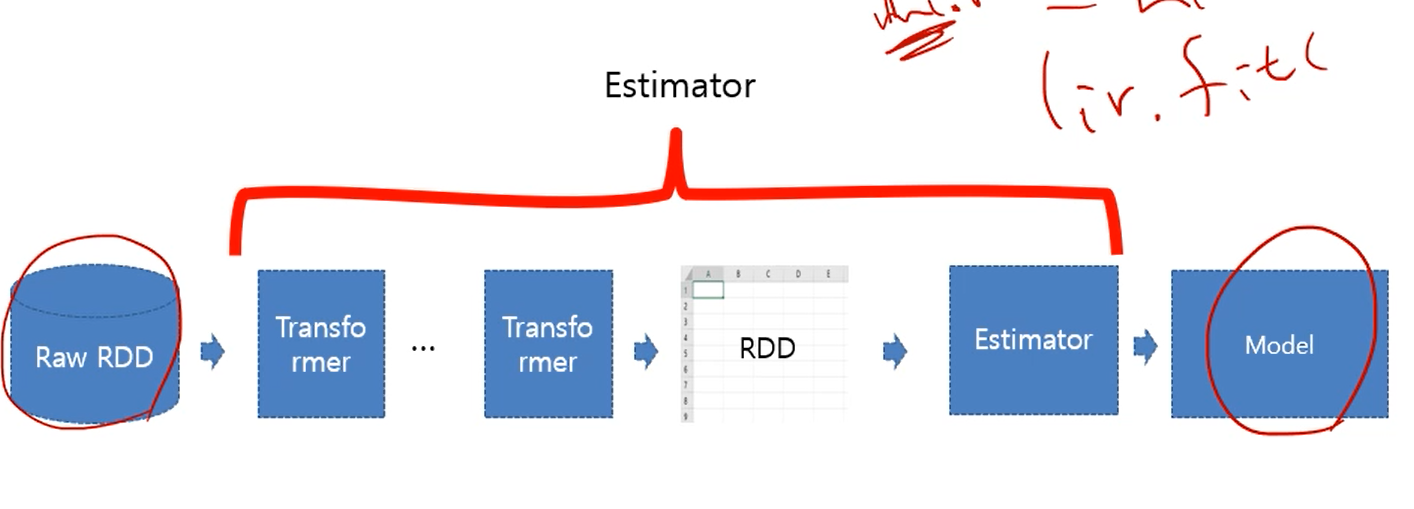

모델을 학습해주고 리턴해주는게 estimator
method
- fit(dataset)
- return 
    - fitted models

LR = Linear_Regression -> 얘가 estimator 

model = LR.fit(train) -> 

result = model.predict(test) -> 여기서 predict가 transformer임. 

# Pipeline 
- 지난 주에 했던거 pipeline으로 짜기 
- imputer, VectorAssembler, strandarlize, logisticresgrne~

In [15]:
from pyspark.sql.types import *
from pyspark.ml import *
from pyspark.sql.functions import *
schema = StructType([
    StructField('Pregnancies',FloatType(),True), #nullable = True로 해두면됨.
    StructField('Glucose',FloatType(),True),
    StructField('BloodPressure',FloatType(),True),
    StructField('SkinThickness',FloatType(),True),
    StructField('Insulin',FloatType(),True),
    StructField('BMI',FloatType(),True),
    StructField('DiabetesPedigreeFunction',FloatType(),True),
    StructField('Age',IntegerType(),True),
    StructField('Outcome',IntegerType(),True),
])

df = spark.read.format("csv").option("header","true").schema(schema).load('/content/drive/MyDrive/Colab Notebooks/데이터분석을위한프로그래밍/diabetes.csv')

train,test = df.randomSplit([0.8,0.2],seed= 37)
from pyspark.ml.feature import *


prep_cols= ('Glucose', 'BloodPressure' ,'SkinThickness', 'Insulin', 'BMI') 

imputer = Imputer(inputCols= prep_cols, outputCols = prep_cols)
cols = df.columns 
cols.remove("Outcome")
assembler = VectorAssembler(inputCols =cols, outputCol = "features")  # -> VectorAssembler는 transformer구나~

standardscaler = StandardScaler(
    inputCol = "features", outputCol = "scaled_features",withStd =True , withMean =False
    )

from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(
    labelCol = "Outcome",
    featuresCol = "scaled_features",
    maxIter =10
)

pipeline = Pipeline(stages =[imputer, assembler, standardscaler, lr])
model = pipeline.fit(train)

In [16]:
predict_train = model.transform(train)
predict_test = model.transform(test)
predict_test.show()
accuracy_df= predict_test.select("Outcome","prediction")
accuracy_df =accuracy_df.withColumn("accuracy",expr("Outcome =prediction"))
true_count = accuracy_df.where("accuracy=='true'").count()
print("정확도는 ", 100*true_count/accuracy_df.count(),"% 입니다")


+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+--------------------+--------------------+----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|            features|     scaled_features|       rawPrediction|         probability|prediction|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+--------------------+--------------------+--------------------+----------+
|        0.0|   78.0|         88.0|         29.0|   40.0|36.9|                   0.434| 21|      0|[0.0,78.0,88.0,29...|[0.0,2.4597963215...|[2.69983704063525...|[0.93701702739881...|       0.0|
|        0.0|   91.0|         68.0|         32.0|  210.0|39.9|                   0.381| 25|      0|[0.0,91.0,68.0,32...|[0.0,2.8697623751...|[1.90156890879052...|[0.87006899211584...|       0.0|
|        0.0|   94.0|    

# imdb 실습
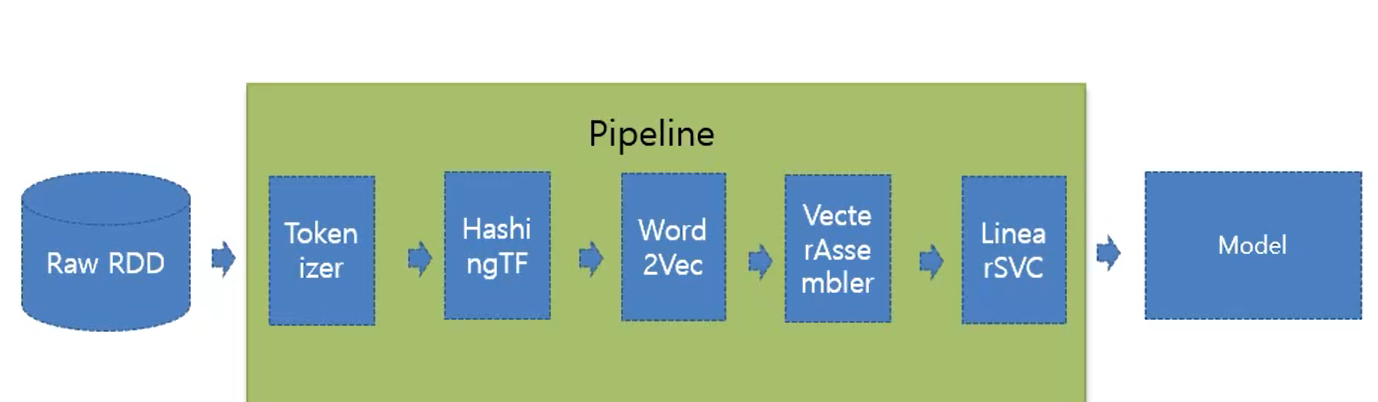

### tokenizer
- 소문자, 공백 기준으로 잘라줌.


In [7]:
df = spark.createDataFrame([
    ('i want to a drink',0),
    ('i dont want to die',1),
    ('i hate a (kk, sun) studying',1)
], ['text','sentiment'])
df.show()

+--------------------+---------+
|                text|sentiment|
+--------------------+---------+
|   i want to a drink|        0|
|  i dont want to die|        1|
|i hate a (kk, sun...|        1|
+--------------------+---------+



In [8]:
from pyspark.ml.feature import *
tokenizer = Tokenizer(inputCol = "text",outputCol = "words")
df = tokenizer.transform(df)
df.show(truncate =100)

+---------------------------+---------+----------------------------------+
|                       text|sentiment|                             words|
+---------------------------+---------+----------------------------------+
|          i want to a drink|        0|           [i, want, to, a, drink]|
|         i dont want to die|        1|          [i, dont, want, to, die]|
|i hate a (kk, sun) studying|        1|[i, hate, a, (kk,, sun), studying]|
+---------------------------+---------+----------------------------------+



In [9]:
from pyspark.ml import *
from pyspark import keyword_only
from pyspark.ml.param.shared import *
class RemoveStopWordsAndSpecialCharacters(Transformer, HasInputCol, HasOutputCol):
  @keyword_only
  def __init__(self, inputCol = None, outputCol =None, stopwords =None):
    super(RemoveStopWordsAndSpecialCharacters, self).__init__()
    self.stopwords = Param(self, "stopwords", "")
    self._setDefault(stopwords=set())
    kwargs = self._input_kwargs
    self._set(**kwargs)
  
  def setStopwords(self, value):
    self._paramMap[self.stopwords] = value
    return self
  
  def getStopwords(self):
    return self.getOrDefault(self.stopwords)
  def _transform(self, dataset):
    stopwords = self.getStopwords()
    def f(s):
      return [ ''.join(e for e in token if e.isalnum()) for token in s if token not in stopwords ]
    t = ArrayType(StringType())
    out_col = self.getOutputCol()
    in_col = dataset[self.getInputCol()]
    return dataset.withColumn(out_col, udf(f, t)(in_col))

In [10]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

cleaning = RemoveStopWordsAndSpecialCharacters(inputCol = "words", outputCol = "clean_words", stopwords = stopwords)
df = cleaning.transform(df)
df.show(truncate=100)

+---------------------------+---------+----------------------------------+----------------------------+
|                       text|sentiment|                             words|                 clean_words|
+---------------------------+---------+----------------------------------+----------------------------+
|          i want to a drink|        0|           [i, want, to, a, drink]|        [want, to, a, drink]|
|         i dont want to die|        1|          [i, dont, want, to, die]|       [dont, want, to, die]|
|i hate a (kk, sun) studying|        1|[i, hate, a, (kk,, sun), studying]|[hate, a, kk, sun, studying]|
+---------------------------+---------+----------------------------------+----------------------------+



### Hashing TF
- maps a sequence of terms to their term frequencies using the hashing trick
- numFeatures : vocab 사이즈 기본값 262144
- inputCol :term의 list가 들어있는 입력 컬럼 이름
- outputCol : term frequency vector 출력컬럼이름


In [11]:
hashingTF = HashingTF(inputCol = tokenizer.getOutputCol() ,outputCol = "tf")
#print(tokenizer.getOutputCol()) 하면 'words' 나옴
df = hashingTF.transform(df)
df.show(truncate =100)

+---------------------------+---------+----------------------------------+----------------------------+---------------------------------------------------------------------------+
|                       text|sentiment|                             words|                 clean_words|                                                                         tf|
+---------------------------+---------+----------------------------------+----------------------------+---------------------------------------------------------------------------+
|          i want to a drink|        0|           [i, want, to, a, drink]|        [want, to, a, drink]|           (262144,[19036,27576,33140,107107,190256],[1.0,1.0,1.0,1.0,1.0])|
|         i dont want to die|        1|          [i, dont, want, to, die]|       [dont, want, to, die]|           (262144,[19036,27576,87273,163059,190256],[1.0,1.0,1.0,1.0,1.0])|
|i hate a (kk, sun) studying|        1|[i, hate, a, (kk,, sun), studying]|[hate, a, kk, sun, studyin

### Cleaning Tokens
- ,,이나 (  같은 stopword를 제거하자.
- 주격대명사나 조동사 등 을 제거하자 

In [13]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import *
from pyspark.ml.classification import LinearSVC

tokenizer = Tokenizer(inputCol = "text",outputCol = "clean_words")
#cleaning = RemoveStopWordsAndSpecialCharacters(inputCol = "words", outputCol = "clean_words", stopwords = stopwords)
hashingTF = HashingTF(inputCol = "clean_words",outputCol = "tf")
w2v = Word2Vec(vectorSize = 2, inputCol ="clean_words", outputCol ="w2v", minCount =1, maxIter=10)
asm = VectorAssembler(inputCols = [hashingTF.getOutputCol(),w2v.getOutputCol()], outputCol = "features") 
svm = LinearSVC(labelCol = "sentiment")

pipeline = Pipeline(stages = [tokenizer, hashingTF, w2v , asm, svm])
df = pipeline.fit(df).transform(df)
df.show()

IllegalArgumentException: ignored

In [14]:

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
tokenizer = Tokenizer(inputCol = "text",outputCol = "words")
cleaning = RemoveStopWordsAndSpecialCharacters(inputCol = "words", outputCol = "clean_words", stopwords = stopwords)
hashingTF = HashingTF(inputCol = "clean_words",outputCol = "tf")
w2v = Word2Vec(vectorSize = 2, inputCol ="clean_words", outputCol ="w2v", minCount =1, maxIter=10)
asm = VectorAssembler(inputCols = [hashingTF.getOutputCol(),w2v.getOutputCol()], outputCol = "features") 
svm = LinearSVC(labelCol = "sentiment")

pipeline = Pipeline(stages = [tokenizer, cleaning, hashingTF, w2v , asm, svm])
df = pipeline.fit(df).transform(df)
df.show()

IllegalArgumentException: ignored

In [ ]:
w2v = Word2Vec(vectorSize = 2, inputCol ="clean_words", outputCol ="w2v", minCount =1, maxIter=10)
model = w2v.fit(df)
model.getVectors().show()

In [ ]:
df =model.transform(df)

In [ ]:
df.show()

In [ ]:
asm = VectorAssembler(inputCols = [hashingTF.getOutputCol(),w2v.getOutputCol()], outputCol = "features") 
df = asm.transform(df)

svm = LinearSVC(labelCol = "sentiment")
df = svm.fit(df).transform(df)
df.show()